<a href="https://colab.research.google.com/github/ArthurLopes-Ads/ArthurLopes-Ads/blob/main/ProjetoAssistido3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow import keras
(x_train_raw, y_train_raw), (x_test_raw, y_test_raw) = keras.datasets.mnist.load_data()
print(x_train_raw.shape, y_train_raw.shape)
print(x_test_raw.shape, y_test_raw.shape)
print(x_train_raw[0])
print(y_train_raw[0])

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0 

In [ ]:
num_classes = 10
y_train = keras.utils.to_categorical(y_train_raw, num_classes)
y_test = keras.utils.to_categorical(y_test_raw, num_classes)
print(y_train_raw[0])
print(y_train[0])

5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


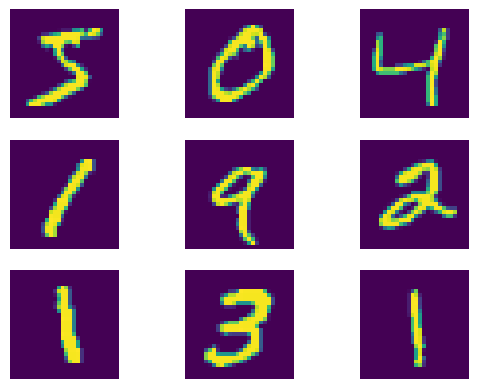

In [ ]:
import matplotlib.pyplot as plt

plt.figure()
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_train_raw[i])
    plt.axis('off')
plt.show()

In [ ]:
x_train = x_train_raw.reshape(60000,784)
x_test = x_test_raw.reshape(10000,784)

In [ ]:
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

In [ ]:
model = keras.Sequential([

keras.layers.Dense(512, activation='relu', input_dim= 784),
keras.layers.Dense(256, activation='relu'),
keras.layers.Dense(128, activation='relu'),
keras.layers.Dense(num_classes, activation='softmax')

])
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 567,434 (2.16 MB)

 Trainable params: 567,434 (2.16 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
Optimizer = keras.optimizers.Adam(0.001)
model.compile(loss=keras.losses.categorical_crossentropy,

optimizer=Optimizer,
metrics=['accuracy'])

In [ ]:
model.fit(x_train, y_train,
batch_size=128,
epochs=10,
validation_data=(x_test, y_test),
verbose=1)

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - accuracy: 0.8705 - loss: 0.4344 - val_accuracy: 0.9680 - val_loss: 0.1032
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.9727 - loss: 0.0882 - val_accuracy: 0.9734 - val_loss: 0.0778
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.9841 - loss: 0.0498 - val_accuracy: 0.9772 - val_loss: 0.0744
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - accuracy: 0.9879 - loss: 0.0373 - val_accuracy: 0.9771 - val_loss: 0.0795
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.9910 - loss: 0.0270 - val_accuracy: 0.9805 - val_loss: 0.0661
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - accuracy: 0.9929 - loss: 0.0231 - val_accuracy: 0.9790 - val_loss: 0.0700
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.9938 - loss: 0.0196 - val_accuracy: 0.9788 - val_loss: 0.0849
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.9923 - loss: 0.0213 - val_ac

In [14]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Perda do teste: ', score[0])
print('Acurácia do teste: ', score[1])

Perda do teste:  0.08559374511241913
Acurácia do teste:  0.9787999987602234


In [16]:
import tensorflow as tf
model = keras.Sequential()

model.add(keras.layers.Conv2D(filters=32,
kernel_size=5,
strides=(1,1),
padding='same',
activation=tf.nn.relu,
input_shape=(28,28,1))

)
model.add(keras.layers.MaxPool2D(pool_size=(2,2),
strides=(2,2),
padding='valid')

)

model.add(keras.layers.Conv2D(filters=64,
kernel_size=3,
strides=(1,1),
padding='same',
activation=tf.nn.relu)

)
model.add(keras.layers.MaxPool2D(pool_size=(2,2),
strides=(2,2),
padding='valid')

)

model.add(keras.layers.Dropout(0.25))
model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(units=128, activation=tf.nn.relu))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(units=10, activation=tf.nn.softmax))
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       401,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 422,154 (1.61 MB)

 Trainable params: 422,154 (1.61 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
X_train = x_train.reshape(60000,28,28,1)
X_test = x_test.reshape(10000,28,28,1)
model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x=X_train,y=y_train,epochs=5, validation_data=(X_test, y_test), batch_size=128)

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 77s 160ms/step - accuracy: 0.8076 - loss: 0.5849 - val_accuracy: 0.9804 - val_loss: 0.0566
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 74s 158ms/step - accuracy: 0.9722 - loss: 0.0951 - val_accuracy: 0.9866 - val_loss: 0.0369
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 83s 161ms/step - accuracy: 0.9778 - loss: 0.0721 - val_accuracy: 0.9902 - val_loss: 0.0297
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 78s 153ms/step - accuracy: 0.9822 - loss: 0.0604 - val_accuracy: 0.9902 - val_loss: 0.0260
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 76s 161ms/step - accuracy: 0.9844 - loss: 0.0475 - val_accuracy: 0.9921 - val_loss: 0.0241


In [18]:
test_loss, test_acc=model.evaluate(x=X_test,y=y_test)
print("Acurácia do teste da CNN: %.2f"%test_acc)
print("Perda do teste da CNN: %.2f"%test_loss)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9904 - loss: 0.0301
Acurácia do teste da CNN: 0.99
Perda do teste da CNN: 0.02


In [24]:
from tensorflow.keras.models import load_model
from tensorflow.keras.activations import softmax


model.save('./model/final_CNN_model.h5')


custom_objects = {'softmax_v2': softmax}
new_model = load_model('./model/final_CNN_model.h5', custom_objects=custom_objects)
new_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       401,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 422,156 (1.61 MB)

 Trainable params: 422,154 (1.61 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [25]:
import numpy as np
import matplotlib.pyplot as plt

def res_visual(n):

    final_opt_a = np.argmax(model.predict(X_test[0:n]), axis=-1)


    ncols = 5
    nrows = (n + ncols - 1) // ncols if n > 0 else 0
    if nrows == 0:
        print('No images to display for n=0.')
        return

    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10, 2*nrows))
    ax = ax.flatten()
    print('resultados da PREVISÃO das {} primeiras imagens do conjunto de teste'.format(n))
    for i in range(n):
        if i < len(final_opt_a):
            print(final_opt_a[i], end=',')
            if int((i + 1) % 5) == 0:
                print('	')

            img = X_test[i].reshape((28, 28))
            ax[i].imshow(img, cmap='Greys', interpolation='nearest')
            ax[i].axis("off")
        else:

            break
    plt.tight_layout()
    plt.show()
    print('primeiras {} primeiras imagens do conjunto de teste'.format(n))
